# Healthcare Claims Data Analysis Assignment

### Part 1 Data Loading and Exploration

In [19]:
# load csv files into pandas dataframes
import pandas as pd
import matplotlib.pyplot as plt
df_header = pd.read_csv("../data/df_header.csv")
df_line = pd.read_csv('../data/df_line.csv')
df_code = pd.read_csv('../data/df_code.csv')


In [3]:
# exploring df_header
print("shapes of df_header:")
print(df_header.shape)
print("First 5 Rows of df_header:")
print(df_header.head(5))
print("Column Names and Data Types:")
print(df_header.dtypes)
print('\n Missing Value Counts:')
print(df_header.isnull().sum())
print('\n Header Statistics for Numerical Columns:')
print(df_header.select_dtypes(include=['int64', 'float64']).describe())


shapes of df_header:
(388, 43)
First 5 Rows of df_header:
   ClientId  ProspectiveClaimId ClaimType  BillingProviderNPI  \
0        49            35216986         P          1154376309   
1        49            35235657         P          1154376309   
2        49            35249003         P          1154376309   
3        49            35249014         P          1154376309   
4        49            35249016         P          1154376309   

               BillingProvFirstName  BillingProvLastName  \
0  NEW YORK SPINE AND BRAIN SURGERY                  NaN   
1  NEW YORK SPINE AND BRAIN SURGERY                  NaN   
2  NEW YORK SPINE AND BRAIN SURGERY                  NaN   
3  NEW YORK SPINE AND BRAIN SURGERY                  NaN   
4  NEW YORK SPINE AND BRAIN SURGERY                  NaN   

   AttendingProviderNPI AttendingProvFirstName AttendingProvLastName  \
0                   NaN                    NaN                   NaN   
1                   NaN                    NaN

In [4]:
#exploring df_line csv
print('\n Shape of df_line:')
print(df_line.shape)
print('First 5 rows of df_line:')
print(df_line.head(5))
print('\n df_line.dtypes:')
print(df_line.dtypes)
print('\n Missing value counts:')
print(df_line.isnull().sum())
print('\n statistics for df_line:')
print(df_line.describe(include=['number']))



 Shape of df_line:
(520, 28)
First 5 rows of df_line:
   ClientId  ProspectiveClaimId  LinePos  RevCode  HCPCS Modifier1 Modifier2  \
0        49            35216986        1      NaN  99291        GC        25   
1        49            35235657        1      NaN  99291        GC        25   
2        49            35244774        1      NaN  99291        GC        25   
3        49            35249003        1      NaN  99291        GC       NaN   
4        49            35249014        1      NaN  99291        GC       NaN   

   Modifier3  Modifier4            DxMapDelim  ...  PlaceOfService  NDC  \
0        NaN        NaN  1,2,3,4,5,6,7,8,9,10  ...              21  NaN   
1        NaN        NaN  1,2,3,4,5,6,7,8,9,10  ...              21  NaN   
2        NaN        NaN  1,2,3,4,5,6,7,8,9,10  ...              21  NaN   
3        NaN        NaN           1,2,3,4,5,6  ...              21  NaN   
4        NaN        NaN           1,2,3,4,5,6  ...              21  NaN   

   NDCUnits  

In [5]:
# exploring df_code csv
print('\n Shape of df_code:')
print(df_code.shape)
print('First 5 rows of df_code:')
print(df_code.head(5))
print('\n df_code.dtypes:')
print(df_code.dtypes)
print('\n Missing value counts:')
print(df_code.isnull().sum())
print('\n statistics for df_code:')
print(df_code.describe(include=['number']))



 Shape of df_code:
(1536, 9)
First 5 rows of df_code:
   ClientId  ProspectiveClaimId CodeQualifier  CodePos CodeValue  \
0        49            36752505           ABF        3     G93.6   
1        49            36819490           ABF        4     N17.9   
2        49            35352862           ABF        2     G06.1   
3        49            35244774           ABF       10     G90.8   
4        49            36745815           ABK        1   I77.819   

   CodeFromDate  CodeToDate  CodeAmnt  POAInd  
0           NaN         NaN       NaN     NaN  
1           NaN         NaN       NaN     NaN  
2           NaN         NaN       NaN     NaN  
3           NaN         NaN       NaN     NaN  
4           NaN         NaN       NaN     NaN  

 df_code.dtypes:
ClientId                int64
ProspectiveClaimId      int64
CodeQualifier          object
CodePos                 int64
CodeValue              object
CodeFromDate          float64
CodeToDate            float64
CodeAmnt            

In [6]:
unique_claims = df_line['ProspectiveClaimId'].nunique()
print('There are a total of:', unique_claims, 'unique claims in the dataset.')

# turn df_line ServiceDate column to datetime
df_line['ServiceDate'] = pd.to_datetime(df_line['ServiceDate'], errors='coerce')
# turn off 00:00:00:00 in the datetime printout
df_line['ServiceDate'] = df_line['ServiceDate'].dt.date
df_line_max_date = df_line['ServiceDate'].max()
df_line_min_date =df_line['ServiceDate'].min()
print(f'The claim service dates ranges from {df_line_min_date} to {df_line_max_date}')

# average LinePos per claim
avg_linepos_claim = df_line.groupby('ProspectiveClaimId')['LinePos'].mean()
print('The average service line on average per claim is:', avg_linepos_claim.mean().round(4))

# average diagnosis codes per claim
avg_diagcode_claim = df_code.groupby('ProspectiveClaimId')['CodeValue'].count()
print('The average number of diagnosis codes per claim is:', avg_diagcode_claim.mean().round(4))

There are a total of: 388 unique claims in the dataset.
The claim service dates ranges from 2023-09-25 to 2024-05-29
The average service line on average per claim is: 1.1701
The average number of diagnosis codes per claim is: 3.9588


### Part 2 Relational Data Analysis

Top 5 Providers by Number of Claims: BillingProvFirstName                 BillingProviderNPI
SB INTERNISTS                        1821035601            152
SB SURGICAL ASSOCIATES               1063468536             81
NEW YORK SPINE AND BRAIN SURGERY     1154376309             69
UNIV.ASSOC.IN OBSTETRICS&GYNECOLOGY  1538114723             40
SB PSYCHIATRIC ASSOCIATES            1437105905             36
Name: ProspectiveClaimId, dtype: int64


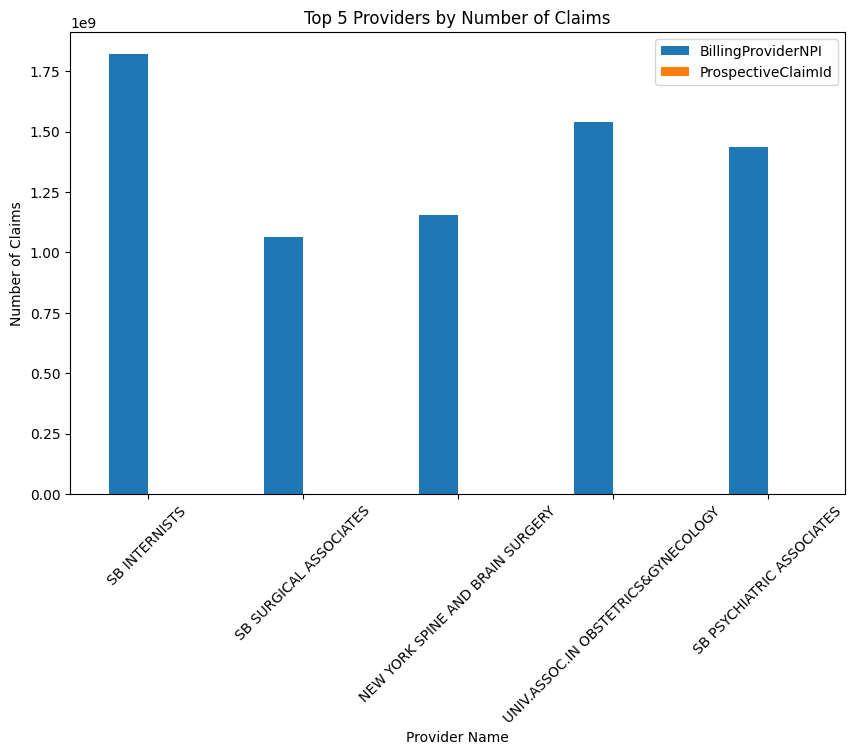

In [62]:
# Question 1: Provider Analysis
top5_providers = df_header.groupby(['BillingProvFirstName', "BillingProviderNPI"])['ProspectiveClaimId'].count().nlargest(5)
print(f'Top 5 Providers by Number of Claims: {top5_providers}')

# chart with only provider name
top5_providers_chart = top5_providers.reset_index()
top5_providers_chart = top5_providers_chart.set_index('BillingProvFirstName')
# simple bar chart
top5_providers_chart.plot(kind='bar', figsize=(10,6), title = 'Top 5 Providers by Number of Claims')
plt.xlabel('Provider Name')
plt.xticks(rotation=45)
plt.ylabel('Number of Claims')
plt.show()

Top 5 Payers by Number of Claims:PrimaryPayerName
MEDICARE                      242
HEALTHFIRST FFS                46
FIDELIS/BETTER HEALTH PLAN     26
HIP MEDICAID                   17
HEALTHFIRST CAPITATED          10
Name: count, dtype: int64
PrimaryPayerName
AETNA                                      1.546392
AETNA MEDICARE                             0.515464
BLUES EXCHANGE                             0.257732
CIGNA HMO                                  0.515464
DIRECT SELF PAY                            1.546392
EMPIRE BLUE HMO                            0.257732
EMPIRE BLUE PPO                            0.515464
EMPIRE BLUE SR                             1.030928
FIDELIS CAPITATED                          1.288660
FIDELIS/BETTER HEALTH PLAN                 6.701031
HEALTHFIRST CAPITATED                      2.577320
HEALTHFIRST ESSENTIAL                      0.257732
HEALTHFIRST FFS                           11.855670
HEALTHFIRST INCREASED BENEFIT PLAN HMO     0.257732
HIP MEDIC

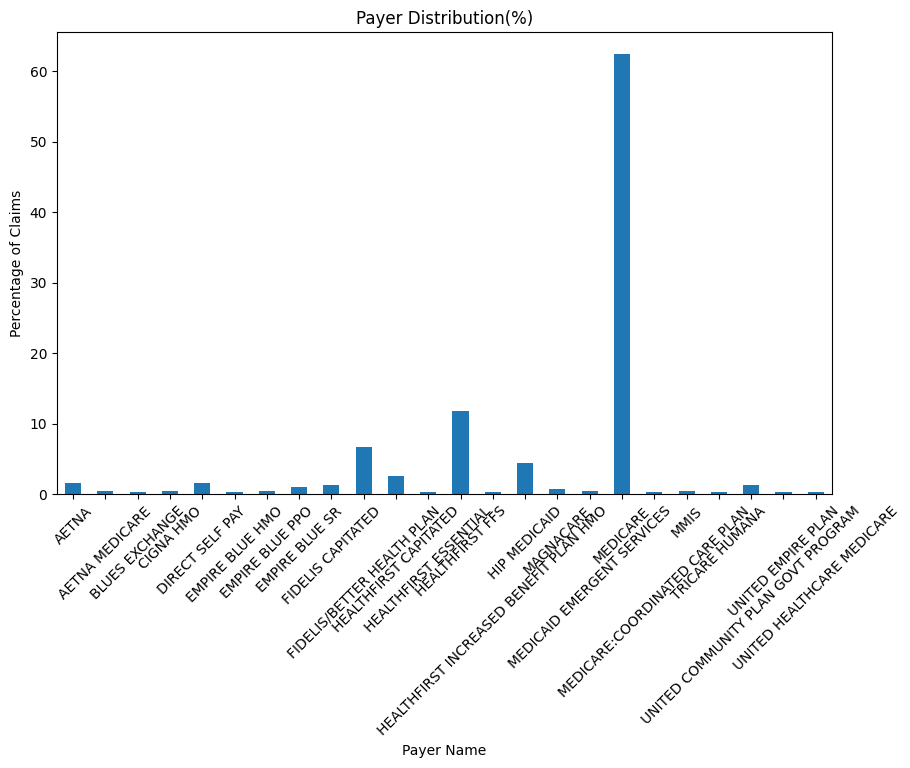

In [45]:
# Question 2: Payer Mix Analysis
top5_payers = df_header['PrimaryPayerName'].value_counts().nlargest(5)
print(f'Top 5 Payers by Number of Claims:{top5_payers}')


claimsper_payer = df_header.groupby('PrimaryPayerName')['ProspectiveClaimId'].count()
payer_distribution = (claimsper_payer / claimsper_payer.sum()) * 100
print(payer_distribution)

# plot bar chart showing payer distribution
payer_distribution.plot(kind='bar', figsize=(10,6), title = 'Payer Distribution(%)')
plt.xlabel('Payer Name')
plt.xticks(rotation=45)
plt.ylabel('Percentage of Claims')
plt.show()

In [ ]:
# Question 3: Common Diagnosis
top10_diagnosiscode = df_code['CodeValue'].value_counts().nlargest(10)

print(f'Top 10 Diagnosis Codes by Frequency:{top10_diagnosiscode}')

Top 10 Diagnosis Codes by Frequency:CodeValue
J96.01    62
E78.5     49
I10       49
G93.5     34
D64.9     29
I25.10    27
I61.9     26
I48.91    24
I60.8     24
I50.9     22
Name: count, dtype: int64


Top 10 Procedure Codes by Frequency:HCPCS  ClientProcedureName                                                       
99291  CRITICAL CARE, INITIAL FIRST HOUR                                             68
99222   INITIAL HOSPITAL CARE PER DAY FOR THE E&M OF A PATIENT;LEVEL 2               30
99233  SUBSEQ. HOSP CARE DETAILED INTERVAL HX,EX,HIGH COMPLEXITY DECISION            27
99223  INITIAL  HOSPITAL CARE PER DAY,FOR THE E&M OF A PATIENT;LEVEL 3               24
99213  OFFICE/OUTPATIENT VISIT,ESTABL.PT,EXPANDED HX,EXAM,LOW COMPLEXITY DECISION    19
99233  SUBSEQUENT HOSP. CARE,PER DAY,FOR THE E&M OF A PATIENT;LEVEL 3                18
90833  PSYCHOTHERAPY WITH AN E&M SERVICE,30 MINS,PATIENT AND/OR FAMILY               16
99213  OFFICE/OUTPATIENT VISIT FOR  E&M OF ESTAB PATIENT;LEVEL 3                     15
92557  COMPREHENSIVE AUDIOMETRY THRESHOLD EVALUATION; SPEECH RECOGNITION             14
99442  TELEPHONE SERVICES MD/NPP;11-20 MINUTES......                                 13
Na

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '99291'),
  Text(1, 0, '99222'),
  Text(2, 0, '99233'),
  Text(3, 0, '99223'),
  Text(4, 0, '99213'),
  Text(5, 0, '99233'),
  Text(6, 0, '90833'),
  Text(7, 0, '99213'),
  Text(8, 0, '92557'),
  Text(9, 0, '99442')])

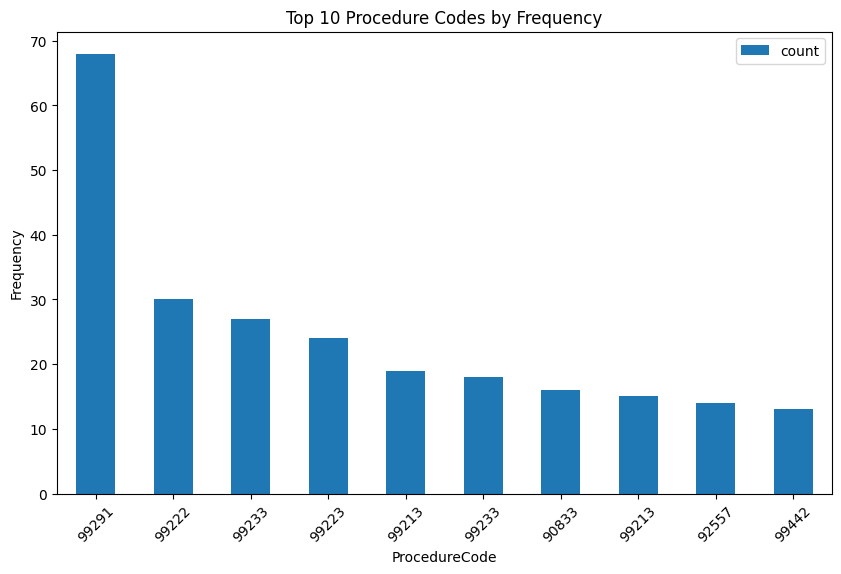

In [64]:
# Question 4: Common Procedures
top10_procedurecode = df_line[['HCPCS','ClientProcedureName']].value_counts().nlargest(10)
print(f'Top 10 Procedure Codes by Frequency:{top10_procedurecode}')


top10_PC_chart = top10_procedurecode.reset_index()
top10_PC_chart = top10_PC_chart.set_index('HCPCS')
top10_PC_chart.plot(kind='bar', figsize=(10,6), title = 'Top 10 Procedure Codes by Frequency')
plt.xlabel('ProcedureCode')
plt.ylabel('Frequency')
plt.xticks(rotation=45)


In [122]:
# Question 5: Service Location Analysis
claims_per_location =df_header[["PlaceOfService","Facility_Location"]].value_counts()
print(f'Claims per Service Location:\n {claims_per_location}')

inpatient_claims = df_header[df_header['Facility_Location'] == 'INPATIENT']['ProspectiveClaimId'].count()
print(f'Number of Inpatient Claims: {inpatient_claims}')

doctoroffice_claims= df_header[df_header['Facility_Location'] == 'DOCTOR\'S OFFICE']['ProspectiveClaimId'].count()
print(f'Number of Doctor\'s Office Claims: {doctoroffice_claims}')

#What percentage of claims are for "INPATIENT" vs "DOCTOR'S OFFICE"?
total_claims = df_header['ProspectiveClaimId'].nunique()
inpatient_claims_pct = (inpatient_claims/total_claims) * 100
doctoroffice_claims_pct = (doctoroffice_claims/total_claims) * 100
print(f'Percentage of Inpatient Claims: {inpatient_claims_pct.round(2)}%')
print(f'Percentage of Doctor\'s Office Claims: {doctoroffice_claims_pct.round(2)}%')


Claims per Service Location:
 PlaceOfService  Facility_Location  
21              INPATIENT              231
11              DOCTOR'S OFFICE        132
22              OUTPATIENT HOSPITAL     14
                AMBULATORY SURGERY      10
23              EMERGENCY                1
Name: count, dtype: int64
Number of Inpatient Claims: 231
Number of Doctor's Office Claims: 132
Percentage of Inpatient Claims: 59.54%
Percentage of Doctor's Office Claims: 34.02%


### Part 3: Advanced Analysis with Joins

In [141]:
# Question 6: Claims with High Service Line Counts
# merge df_header and df_line on ProspectiveClaimId
merged_df = pd.merge(df_header, df_line, on='ProspectiveClaimId', how='inner')


line_count= merged_df.groupby('ProspectiveClaimId')['LinePos'].count()
print(f'Line Position Counts per Claim:\n {line_count}')

morethan5lines = merged_df.groupby('ProspectiveClaimId').filter(lambda x:x ['LinePos'].count() > 5)
display = morethan5lines[['ProspectiveClaimId', 'BillingProvFirstName', 'LinePos','Charges']]
print(f'Line position Counts greater than 5:\n {display.to_string(index=False)}')

Line Position Counts per Claim:
 ProspectiveClaimId
35216986    1
35235657    1
35244774    1
35249003    1
35249014    1
           ..
36999799    3
37001070    4
37001295    3
37001309    3
37001489    2
Name: LinePos, Length: 388, dtype: int64
Line position Counts greater than 5:
  ProspectiveClaimId                BillingProvFirstName  LinePos  Charges
           36740402 UNIV.ASSOC.IN OBSTETRICS&GYNECOLOGY        1      160
           36740402 UNIV.ASSOC.IN OBSTETRICS&GYNECOLOGY        2       25
           36740402 UNIV.ASSOC.IN OBSTETRICS&GYNECOLOGY        3       85
           36740402 UNIV.ASSOC.IN OBSTETRICS&GYNECOLOGY        4       70
           36740402 UNIV.ASSOC.IN OBSTETRICS&GYNECOLOGY        5      490
           36740402 UNIV.ASSOC.IN OBSTETRICS&GYNECOLOGY        6      115
           36668119 UNIV.ASSOC.IN OBSTETRICS&GYNECOLOGY        1      155
           36668119 UNIV.ASSOC.IN OBSTETRICS&GYNECOLOGY        2       85
           36668119 UNIV.ASSOC.IN OBSTETRICS&GYNE

In [151]:
# Question 7: Diagnosis-Procedure Combinations
merged_df = pd.merge(df_line, df_code, on= "ProspectiveClaimId", how= "inner")
merged_df = pd.merge(merged_df,df_header, on= "ProspectiveClaimId", how= "inner")

mostcommondxcode = merged_df[merged_df['HCPCS'] == '99291'].groupby(['CodeValue', 'HCPCS']).size().nlargest(1)
print(f'Top 10 Diagnosis-Procedure Combinations by Frequency:\n {mostcommondxcode}')


Top 10 Diagnosis-Procedure Combinations by Frequency:
 CodeValue  HCPCS
J96.01     99291    53
dtype: int64


In [159]:
# Question 8: Charges by Payer
merged_df = pd.merge(df_header, df_line, on='ProspectiveClaimId', how='inner')
charges_by_payer = merged_df.groupby('ProspectiveClaimId')["Charges"].sum()
print(f'The total charges per claim are:\n {charges_by_payer}')

totalcharges = charges_by_payer.sum()
print(f'The total charges across all claims is: {totalcharges.round(2)}')
avg_charge_per_claim = charges_by_payer.mean()
print(f'The average charges per claim is: {avg_charge_per_claim.round(2)}')
number_of_claims = charges_by_payer.count()
print(f' The total number of claims is: {number_of_claims}')

The total charges per claim are:
 ProspectiveClaimId
35216986    1155
35235657    1155
35244774    1155
35249003    1155
35249014    1155
            ... 
36999799     855
37001070    1150
37001295     211
37001309     210
37001489     105
Name: Charges, Length: 388, dtype: int64
The total charges across all claims is: 236871
The average charges per claim is: 610.49
 The total number of claims is: 388


### Part 4: Creative Analysis